In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys

def bitvector_to_array(bitvector):
    bitlist = list(bitvector.ToBitString())
    return np.array([int(b) for b in bitlist], dtype=np.uint8)

def read_and_filter_data(file_path, pIC50threshold):
    data = pd.read_csv(file_path)
    return data[data['pIC50'] >= float(pIC50threshold)]

def calculate_fingerprints(filtered_data):
    filtered_data['Molecule'] = filtered_data['smiles'].apply(lambda x: Chem.MolFromSmiles(x))
    filtered_data = filtered_data[filtered_data['Molecule'].notnull()]  # Remove rows where Molecule is None
    filtered_data['Fingerprint'] = filtered_data['Molecule'].apply(
        lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=512))
    return filtered_data, np.array([bitvector_to_array(fp) for fp in filtered_data['Fingerprint']])

def perform_clustering_and_save(filtered_data, fingerprints, file_path, clus_num):
    distances = cdist(fingerprints, fingerprints, metric='jaccard')
    cluster = AgglomerativeClustering(n_clusters=int(clus_num), affinity='precomputed', linkage='average')
    clusters = cluster.fit_predict(distances)
    filtered_data['Cluster'] = clusters
    top_molecules = filtered_data.loc[filtered_data.groupby('Cluster')['pIC50'].idxmax()]
    output_file_path = file_path.replace('.csv', '_clus.csv')
    top_molecules.to_csv(output_file_path, index=False)

def tsne_visualization_and_save(fingerprints, clusters, pIC50, file_path):
    tsne = TSNE(n_components=2, random_state=0)
    fingerprints_tsne = tsne.fit_transform(fingerprints)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(fingerprints_tsne[:, 0], fingerprints_tsne[:, 1], pIC50, c=clusters, cmap='viridis', s=50, alpha=0.6)
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.set_zlabel('pIC50')
    plt.title('3D t-SNE of Molecular Fingerprints')
    fig.colorbar(sc, label='Cluster ID')
    figpath = file_path.replace('.csv', '_3D_tSNE.png')
    plt.savefig(figpath, dpi=1200)  # You can adjust DPI if needed
    plt.close()
    return figpath

def process_excel_file(handle_file, pIC50threshold, clus_num):
    filtered_data = read_and_filter_data(handle_file, pIC50threshold)
    if len(filtered_data) < int(clus_num):
        print(f"Skipping file due to insufficient data points.")
        return
    filtered_data, fingerprints = calculate_fingerprints(filtered_data)
    perform_clustering_and_save(filtered_data, fingerprints, handle_file, clus_num)
    figpath = tsne_visualization_and_save(fingerprints, filtered_data['Cluster'], filtered_data['pIC50'], handle_file)
    print(f"Processed and saved data and 3D t-SNE plot for the file.")
    return figpath

if __name__ == "__main__":
    # Expecting command-line arguments for the clustering number, pIC50 threshold, and file path
    clus_num = sys.argv[1]
    pIC50threshold = sys.argv[2]
    handle_file = sys.argv[3]
    process_excel_file(handle_file, pIC50threshold, clus_num)


[11:44:38] SMILES Parse Error: syntax error while parsing: 0
[11:44:38] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
/opt/anaconda3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/SME/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/SME/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


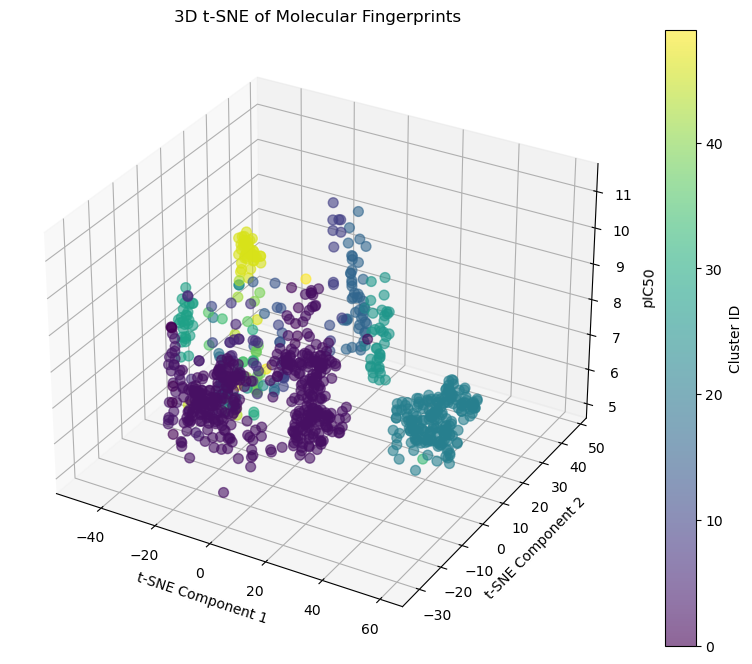

In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def bitvector_to_array(bitvector):
    bitlist = list(bitvector.ToBitString())
    return np.array([int(b) for b in bitlist], dtype=np.uint8)

def read_and_filter_data(file_path, pIC50threshold):
    data = pd.read_csv(file_path)
    return data[data['pIC50'] >= float(pIC50threshold)]

def calculate_fingerprints(filtered_data):
    filtered_data['Molecule'] = filtered_data['smiles'].apply(lambda x: Chem.MolFromSmiles(x))
    filtered_data = filtered_data[filtered_data['Molecule'].notnull()]  # Remove rows where Molecule is None
    filtered_data['Fingerprint'] = filtered_data['Molecule'].apply(
        lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=512))
    return filtered_data, np.array([bitvector_to_array(fp) for fp in filtered_data['Fingerprint']])

def perform_clustering_and_save(filtered_data, fingerprints, clus_num):
    distances = cdist(fingerprints, fingerprints, metric='jaccard')
    cluster = AgglomerativeClustering(n_clusters=int(clus_num), affinity='precomputed', linkage='average')
    clusters = cluster.fit_predict(distances)
    filtered_data['Cluster'] = clusters
    top_molecules = filtered_data.loc[filtered_data.groupby('Cluster')['pIC50'].idxmax()]
    return top_molecules

def tsne_visualization_and_save(fingerprints, clusters, pIC50):
    tsne = TSNE(n_components=2, random_state=0)
    fingerprints_tsne = tsne.fit_transform(fingerprints)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(fingerprints_tsne[:, 0], fingerprints_tsne[:, 1], pIC50, c=clusters, cmap='viridis', s=50, alpha=0.6)
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.set_zlabel('pIC50')
    plt.title('3D t-SNE of Molecular Fingerprints')
    fig.colorbar(sc, label='Cluster ID')
    plt.show()

# 参数设定
file_path = '/home/hoo/Roufen/CDK9/dataset/CDK9_fil_filter.csv'  # 替换为你的文件路径
pIC50threshold = 0  # 替换为你想要的pIC50阈值
clus_num = 50  # 替换为你想要的聚类数量

# 读取并过滤数据
filtered_data = read_and_filter_data(file_path, pIC50threshold)

# 检查是否有足够的数据点进行聚类
if len(filtered_data) < clus_num:
    print(f"Skipping file due to insufficient data points.")
else:
    # 计算指纹
    filtered_data, fingerprints = calculate_fingerprints(filtered_data)
    
    # 执行聚类并保存结果
    top_molecules = perform_clustering_and_save(filtered_data, fingerprints, clus_num)
    
    # 生成并保存3D t-SNE图
    tsne_visualization_and_save(fingerprints, filtered_data['Cluster'], filtered_data['pIC50'])


[13:01:33] SMILES Parse Error: syntax error while parsing: 0
[13:01:33] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
/opt/anaconda3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a

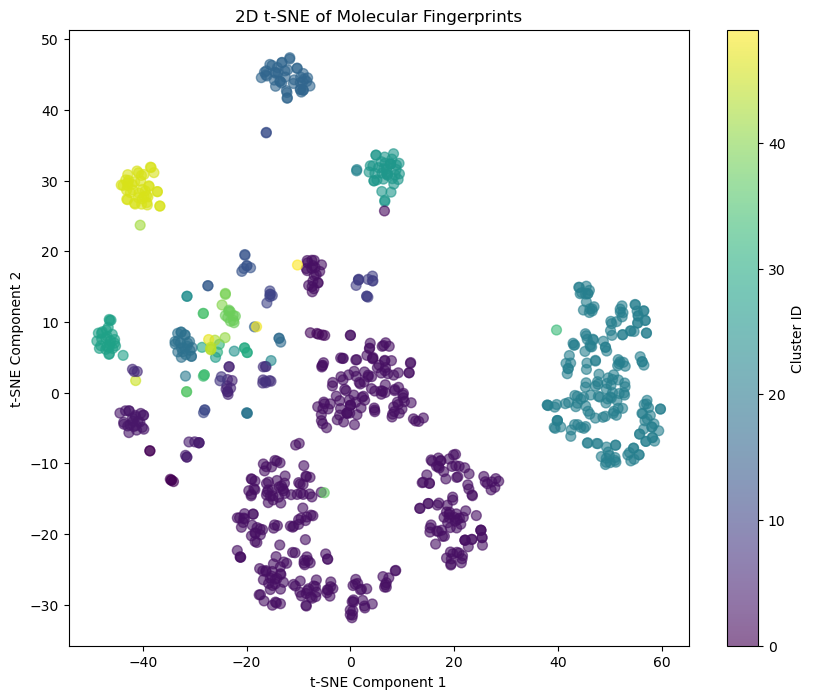

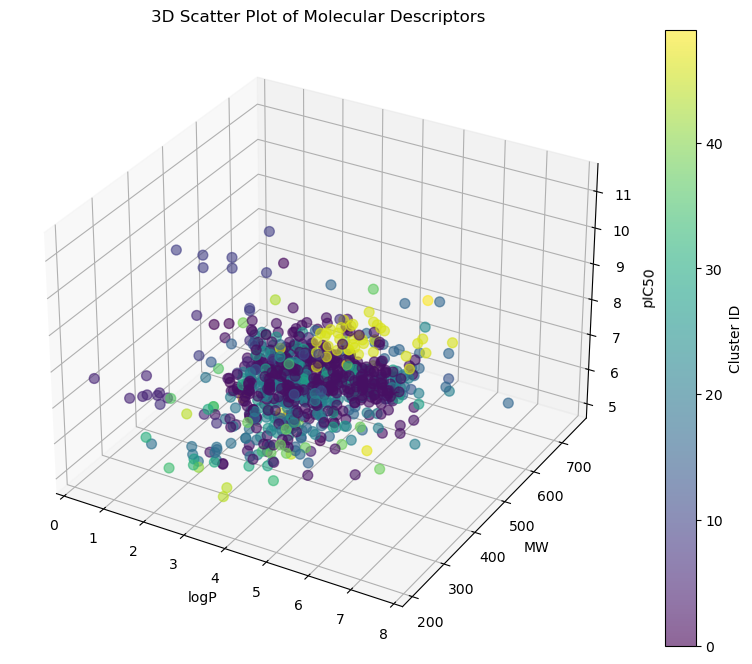

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义函数
def bitvector_to_array(bitvector):
    bitlist = list(bitvector.ToBitString())
    return np.array([int(b) for b in bitlist], dtype=np.uint8)

def read_and_filter_data(file_path, pIC50threshold):
    data = pd.read_csv(file_path)
    return data[data['pIC50'] >= float(pIC50threshold)]

def calculate_fingerprints_and_descriptors(filtered_data):
    filtered_data['Molecule'] = filtered_data['smiles'].apply(lambda x: Chem.MolFromSmiles(x))
    filtered_data = filtered_data[filtered_data['Molecule'].notnull()]  # Remove rows where Molecule is None
    filtered_data['Fingerprint'] = filtered_data['Molecule'].apply(
        lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=512))
    filtered_data['logP'] = filtered_data['Molecule'].apply(lambda x: Descriptors.MolLogP(x))
    filtered_data['MW'] = filtered_data['Molecule'].apply(lambda x: Descriptors.MolWt(x))
    return filtered_data, np.array([bitvector_to_array(fp) for fp in filtered_data['Fingerprint']])

def perform_clustering_and_save(filtered_data, fingerprints, clus_num):
    distances = cdist(fingerprints, fingerprints, metric='jaccard')
    cluster = AgglomerativeClustering(n_clusters=int(clus_num), affinity='precomputed', linkage='average')
    clusters = cluster.fit_predict(distances)
    filtered_data['Cluster'] = clusters
    top_molecules = filtered_data.loc[filtered_data.groupby('Cluster')['pIC50'].idxmax()]
    return top_molecules

def tsne_visualization_and_save(filtered_data, clusters):
    tsne = TSNE(n_components=2, random_state=0)
    fingerprints_tsne = tsne.fit_transform(filtered_data['Fingerprint'].tolist())
    filtered_data['TSNE1'] = fingerprints_tsne[:, 0]
    filtered_data['TSNE2'] = fingerprints_tsne[:, 1]

    # 绘制二维t-SNE图
    plt.figure(figsize=(10, 8))
    plt.scatter(fingerprints_tsne[:, 0], fingerprints_tsne[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title('2D t-SNE of Molecular Fingerprints')
    plt.colorbar(label='Cluster ID')
    plt.show()

    # 绘制三维图，x轴为logP，y轴为MW，z轴为pIC50
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(filtered_data['logP'], filtered_data['MW'], filtered_data['pIC50'], c=clusters, cmap='viridis', s=50, alpha=0.6)
    ax.set_xlabel('logP')
    ax.set_ylabel('MW')
    ax.set_zlabel('pIC50')
    plt.title('3D Scatter Plot of Molecular Descriptors')
    fig.colorbar(sc, label='Cluster ID')
    plt.show()

# 参数设定
file_path = '/home/hoo/Roufen/CDK9/dataset/CDK9_fil_filter.csv'  # 替换为你的文件路径
pIC50threshold = 0  # 替换为你想要的pIC50阈值
clus_num = 50  # 替换为你想要的聚类数量

# 读取并过滤数据
filtered_data = read_and_filter_data(file_path, pIC50threshold)

# 检查是否有足够的数据点进行聚类
if len(filtered_data) < clus_num:
    print(f"Skipping file due to insufficient data points.")
else:
    # 计算指纹和分子描述符
    filtered_data, fingerprints = calculate_fingerprints_and_descriptors(filtered_data)
    
    # 执行聚类并保存结果
    top_molecules = perform_clustering_and_save(filtered_data, fingerprints, clus_num)
    
    # 生成并保存t-SNE图和3D分子描述符散点图
    tsne_visualization_and_save(filtered_data, filtered_data['Cluster'])


[13:52:10] SMILES Parse Error: syntax error while parsing: 0
[13:52:10] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
/opt/anaconda3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a

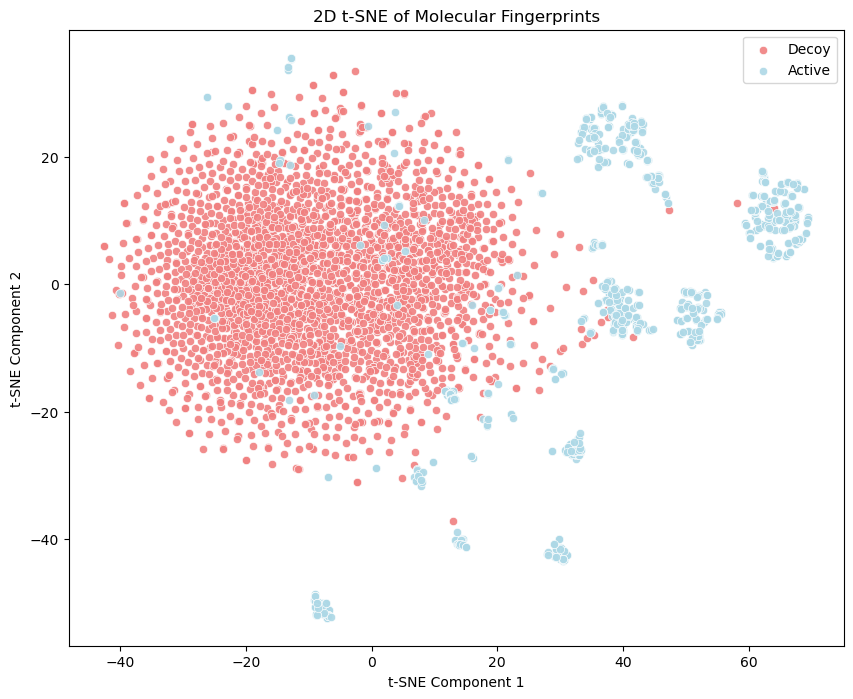

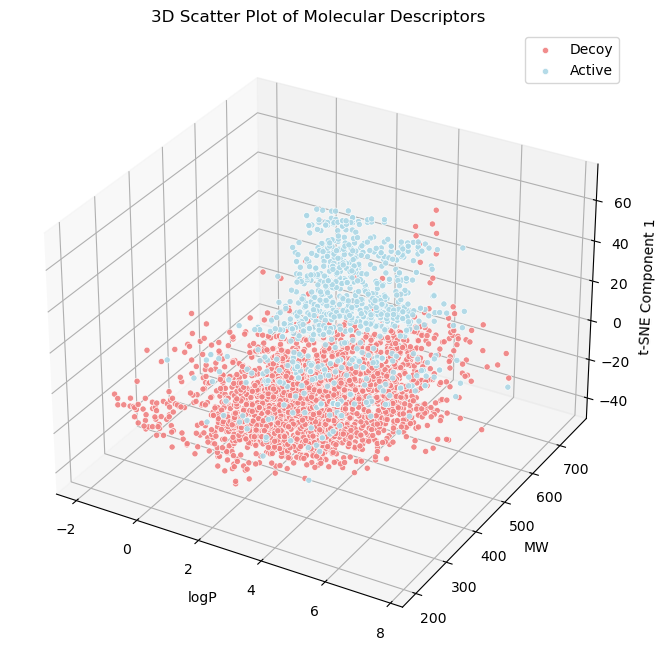

In [31]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义函数
def bitvector_to_array(bitvector):
    bitlist = list(bitvector.ToBitString())
    return np.array([int(b) for b in bitlist], dtype=np.uint8)

def read_data(file_path):
    data = pd.read_csv(file_path)
    return data

def is_valid_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

def calculate_fingerprints_and_descriptors(data):
    # 将所有smiles值转换为字符串
    data['smiles'] = data['smiles'].astype(str)
    data['Molecule'] = data['smiles'].apply(lambda x: Chem.MolFromSmiles(x) if is_valid_smiles(x) else None)
    data = data[data['Molecule'].notnull()]  # Remove rows where Molecule is None
    data['Fingerprint'] = data['Molecule'].apply(
        lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=512))
    data['logP'] = data['Molecule'].apply(lambda x: Descriptors.MolLogP(x))
    data['MW'] = data['Molecule'].apply(lambda x: Descriptors.MolWt(x))
    return data, np.array([bitvector_to_array(fp) for fp in data['Fingerprint']])

def tsne_visualization_and_save(data):
    tsne = TSNE(n_components=2, random_state=0)
    fingerprints_tsne = tsne.fit_transform(data['Fingerprint'].tolist())
    data['TSNE1'] = fingerprints_tsne[:, 0]
    data['TSNE2'] = fingerprints_tsne[:, 1]

    # 绘制二维t-SNE图
    plt.figure(figsize=(10, 8))
    decoy = data[data['label'] == 'decoy']
    active = data[data['label'] == 'active']
    plt.scatter(decoy['TSNE1'], decoy['TSNE2'], c='lightcoral', label='Decoy', alpha=0.9, edgecolors='w', linewidth=0.5)
    plt.scatter(active['TSNE1'], active['TSNE2'], c='lightblue', label='Active', alpha=0.9, edgecolors='w', linewidth=0.5)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title('2D t-SNE of Molecular Fingerprints')
    plt.legend()
    plt.show()

    # 绘制三维图，x轴为logP，y轴为MW，z轴为t-SNE Component 1
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(decoy['logP'], decoy['MW'], decoy['TSNE1'], c='lightcoral', label='Decoy', alpha=0.9, edgecolors='w', linewidth=0.5)
    ax.scatter(active['logP'], active['MW'], active['TSNE1'], c='lightblue', label='Active', alpha=0.9, edgecolors='w', linewidth=0.5)
    ax.set_xlabel('logP')
    ax.set_ylabel('MW')
    ax.set_zlabel('t-SNE Component 1')
    plt.title('3D Scatter Plot of Molecular Descriptors')
    ax.legend()
    plt.show()

# 读取数据
file_path = '/home/hoo/Roufen/CDK9/dataset/CDK9_active_decoys.csv'
data = read_data(file_path)

# 计算指纹和分子描述符
data, fingerprints = calculate_fingerprints_and_descriptors(data)

# 生成并保存t-SNE图和3D分子描述符散点图
tsne_visualization_and_save(data)


/opt/anaconda3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/SME/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/SME/lib/python3.7/site-packages/sklearn/manifold/_t_sn

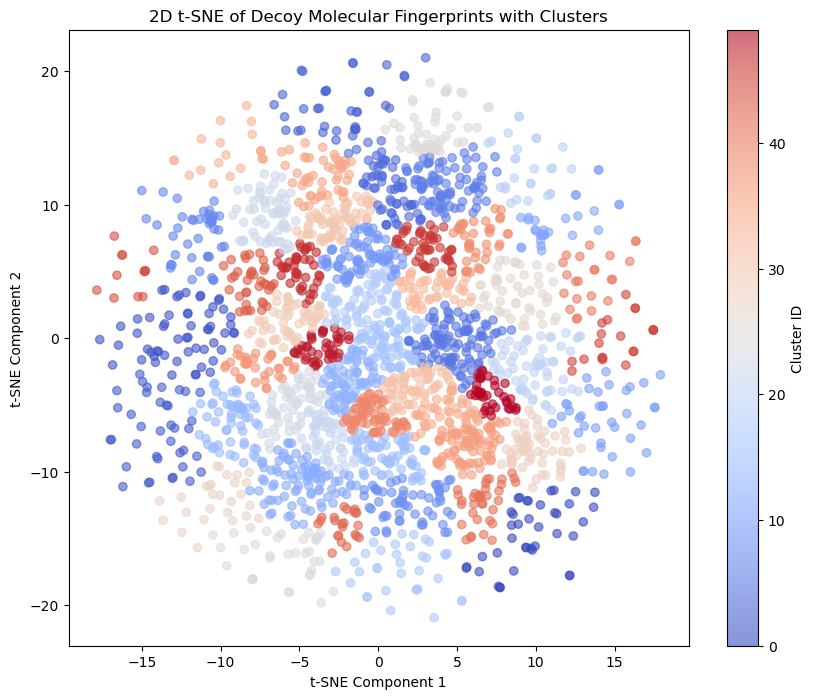

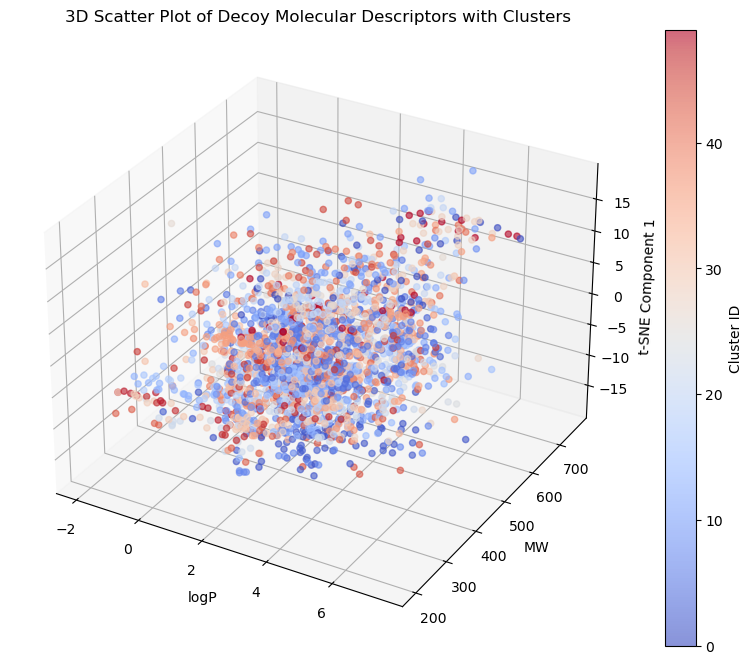

In [15]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义函数
def bitvector_to_array(bitvector):
    bitlist = list(bitvector.ToBitString())
    return np.array([int(b) for b in bitlist], dtype=np.uint8)

def read_data(file_path):
    data = pd.read_csv(file_path)
    return data

def is_valid_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

def calculate_fingerprints_and_descriptors(data):
    # 将所有smiles值转换为字符串
    data['smiles'] = data['smiles'].astype(str)
    data['Molecule'] = data['smiles'].apply(lambda x: Chem.MolFromSmiles(x) if is_valid_smiles(x) else None)
    data = data[data['Molecule'].notnull()]  # Remove rows where Molecule is None
    data['Fingerprint'] = data['Molecule'].apply(
        lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=512))
    data['logP'] = data['Molecule'].apply(lambda x: Descriptors.MolLogP(x))
    data['MW'] = data['Molecule'].apply(lambda x: Descriptors.MolWt(x))
    return data, np.array([bitvector_to_array(fp) for fp in data['Fingerprint']])

def tsne_and_cluster(data, n_clusters=5):
    tsne = TSNE(n_components=2, random_state=0)
    fingerprints_tsne = tsne.fit_transform(data['Fingerprint'].tolist())
    data['TSNE1'] = fingerprints_tsne[:, 0]
    data['TSNE2'] = fingerprints_tsne[:, 1]

    # 聚类
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    data['Cluster'] = clustering.fit_predict(fingerprints_tsne)
    
    return data

def plot_2d_tsne(data):
    plt.figure(figsize=(10, 8))
    plt.scatter(data['TSNE1'], data['TSNE2'], c=data['Cluster'], cmap='coolwarm', alpha=0.6)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title('2D t-SNE of Decoy Molecular Fingerprints with Clusters')
    plt.colorbar(label='Cluster ID')
    plt.show()

def plot_3d(data):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(data['logP'], data['MW'], data['TSNE1'], c=data['Cluster'], cmap='coolwarm', alpha=0.6)
    ax.set_xlabel('logP')
    ax.set_ylabel('MW')
    ax.set_zlabel('t-SNE Component 1')
    plt.title('3D Scatter Plot of Decoy Molecular Descriptors with Clusters')
    fig.colorbar(sc, ax=ax, label='Cluster ID')
    plt.show()

# 读取数据
file_path = '/home/hoo/Roufen/CDK9/dataset/CDK9_active_decoys.csv'
data = read_data(file_path)

# 过滤Decoy数据
decoy_data = data[data['label'] == 'decoy']

# 计算指纹和分子描述符
decoy_data, fingerprints = calculate_fingerprints_and_descriptors(decoy_data)

# t-SNE降维和聚类
n_clusters = 50  # 聚类数量
decoy_data = tsne_and_cluster(decoy_data, n_clusters=n_clusters)

# 生成并保存t-SNE图和3D分子描述符散点图
plot_2d_tsne(decoy_data)
plot_3d(decoy_data)

